In [1]:
# Install necessary libraries
# !pip install cdsapi xarray matplotlib netCDF4

import cdsapi
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

#### Check the Data

In [4]:
# Initialize the CDS API client
c = cdsapi.Client()

# Define the Alberta bounding box (North, West, South, East)
# bbox = [60, -120, 50, -110]  # Alberta, Canada
bbox = [83, -170, 24, -50]  # North America
pressure_levels = ['250', '500', '850', '1000'] 
start_year = 1940
end_year = 2023

# Path to save the downloaded NetCDF file
dir = Path(r'D:\UCalgary_Lectures\GEOG_683\Data_workspace')
output_file = dir / 'NAmerica_geopotential_1940_2023.nc'

# Step 1: Download the data using the CDS API
if not output_file.exists():
    print("Downloading ERA5 data from {0} to {1}...".format(start_year, end_year))
    c.retrieve(
        'reanalysis-era5-pressure-levels-monthly-means',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': ['u_component_of_wind', 'v_component_of_wind', 'geopotential', 'temperature'],  
            'pressure_level': pressure_levels,
            'year': [str(year) for year in range(start_year, end_year+1)],
            'month': [f'{month:02d}' for month in range(1, 13)],
            'time': ['12:00'],
            'area': bbox,
        },
        str(output_file)
    )
    print("Download complete.")
else:
    print(f"File {output_file} already exists. Skipping download.")

2024-09-08 00:29:15,215 INFO Request ID is 3ae183b4-0243-4f90-a7e1-4baca8c21a19
2024-09-08 00:29:15,421 INFO status has been updated to accepted
2024-09-08 00:29:17,234 INFO status has been updated to failed


HTTPError: 400 Client Error: Bad Request for url: https://cds-beta.climate.copernicus.eu/api/retrieve/v1/jobs/3ae183b4-0243-4f90-a7e1-4baca8c21a19/results
The job has failed.
The job failed with: ValueError

In [1]:
import pandas as pd
import xarray as xr

# Load the netCDF file
ds_2 = xr.open_dataset(r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023.nc')

print(ds_2)

<xarray.Dataset>
Dimensions:         (date: 1008, pressure_level: 4, latitude: 237,
                     longitude: 481)
Coordinates:
  * date            (date) int64 19400101 19400201 ... 20231101 20231201
  * pressure_level  (pressure_level) float64 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 83.0 82.75 82.5 82.25 ... 24.5 24.25 24.0
  * longitude       (longitude) float64 -170.0 -169.8 -169.5 ... -50.25 -50.0
Data variables:
    number          int64 ...
    expver          (date) object ...
    u               (date, pressure_level, latitude, longitude) float32 ...
    v               (date, pressure_level, latitude, longitude) float32 ...
    z               (date, pressure_level, latitude, longitude) float32 ...
    t               (date, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:    

In [4]:
print(ds_2['date'])

<xarray.DataArray 'date' (date: 1008)>
array([19400101, 19400201, 19400301, ..., 20231001, 20231101, 20231201],
      dtype=int64)
Coordinates:
  * date     (date) int64 19400101 19400201 19400301 ... 20231101 20231201
Attributes:
    long_name:  original GRIB coordinate for key: date(date)
    units:      1


#### Convert Date to Datetime

In [8]:
# Assuming 'ds' is your xarray dataset and 'date' is the array of integers
date_array = ds_2['date'].values

# Convert the array to datetime using pandas
dates_as_datetime = pd.to_datetime(date_array.astype(str), format='%Y%m%d')

# Add the new datetime array to the dataset as a new variable
ds_2 = ds_2.assign(datetime=('date', dates_as_datetime))

# Print the dataset to verify the new 'datetime' variable
ds_2.to_netcdf(r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc')

In [3]:
ds_2 = xr.open_dataset(r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc')
print(ds_2)

<xarray.Dataset>
Dimensions:         (pressure_level: 4, latitude: 237, longitude: 481,
                     date: 1008)
Coordinates:
  * pressure_level  (pressure_level) float64 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 83.0 82.75 82.5 82.25 ... 24.5 24.25 24.0
  * longitude       (longitude) float64 -170.0 -169.8 -169.5 ... -50.25 -50.0
  * date            (date) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-12-01
Data variables:
    number          int64 ...
    expver          (date) object ...
    u               (date, pressure_level, latitude, longitude) float32 ...
    v               (date, pressure_level, latitude, longitude) float32 ...
    z               (date, pressure_level, latitude, longitude) float32 ...
    t               (date, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Convention

In [12]:
print(ds_2['datetime'])

<xarray.DataArray 'datetime' (date: 1008)>
[1008 values with dtype=datetime64[ns]]
Coordinates:
  * date     (date) int64 19400101 19400201 19400301 ... 20231101 20231201


In [2]:
# Assuming 'ds' is your xarray dataset and 'date' is the array of integers
date_array = ds_2['date'].values

# Convert the array to datetime using pandas
dates_as_datetime = pd.to_datetime(date_array.astype(str), format='%Y%m%d')

# Remove the old 'date' variable and replace it with the datetime values
ds_2 = ds_2.drop_vars('date')  # Remove the original 'date' variable
ds_2 = ds_2.assign_coords(date=dates_as_datetime)  # Assign the new datetime array as 'date'

# Check if the replacement worked
print(ds_2['date'])

# Save the updated dataset to a new NetCDF file
ds_2.to_netcdf(r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc')


<xarray.DataArray 'date' (date: 1008)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-12-01


In [1]:
import xarray as xr
import numpy as np
from scipy.stats import theilslopes
import rasterio
from rasterio.transform import from_origin

# Step 1: Open the ERA5 netCDF file and extract 1000mb temperature data
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc'
ds_2 = xr.open_dataset(nc_file)

# Step 2: Extract the temperature ('t') variable at the 1000mb pressure level
t_1000mb = ds_2['t'].sel(pressure_level=250)  # Extract temperature at 1000mb

# Step 3: Convert the temperature from Kelvin to Celsius
t_1000mb_celsius = t_1000mb - 273.15  # Convert to Celsius

# Step 4: Extract the time and temperature data (in Celsius now)
time = np.arange(len(ds_2['date']))  # Use the indices of the 'date' variable as time
temperature_data = t_1000mb_celsius.values  # 4D array (date, latitude, longitude)

# Step 5: Prepare the latitude and longitude coordinates
lat = ds_2['latitude'].values
lon = ds_2['longitude'].values

print(t_1000mb.shape)
print(t_1000mb_celsius)

(1008, 237, 481)
<xarray.DataArray 't' (date: 1008, latitude: 237, longitude: 481)>
array([[[-61.748764, -61.737045, -61.729233, ..., -55.72728 ,
         -55.73607 , -55.74681 ],
        [-61.603256, -61.604233, -61.60814 , ..., -55.203842,
         -55.21556 , -55.229233],
        [-61.51146 , -61.521225, -61.53392 , ..., -54.655014,
         -54.66771 , -54.683334],
        ...,
        [-42.964584, -42.95677 , -42.967514, ..., -43.56517 ,
         -43.58568 , -43.617905],
        [-42.95482 , -42.939194, -42.938217, ..., -43.239   ,
         -43.274155, -43.313217],
        [-42.987045, -42.96849 , -42.9597  , ..., -42.95482 ,
         -42.994858, -43.034897]],

       [[-55.111816, -55.11963 , -55.128418, ..., -52.458496,
         -52.48877 , -52.52002 ],
        [-55.220215, -55.228027, -55.23584 , ..., -52.467285,
         -52.50049 , -52.535645],
        [-55.31201 , -55.319824, -55.328613, ..., -52.458496,
         -52.492676, -52.527832],
...
        [-41.979095, -42.039642, 

In [3]:
# Step 5: Prepare an array to store the Theil-Sen slopes
slope_array = np.zeros((len(lat), len(lon)), dtype=np.float32)

# Step 6: Perform Theil-Sen regression for each pixel (latitude, longitude)
for i in range(len(lat)):
    for j in range(len(lon)):
        # Extract the temperature time series for the current pixel
        pixel_time_series = temperature_data[:, i, j]
        
        # Check if the pixel contains any NaN values (skip if invalid data)
        if np.any(np.isnan(pixel_time_series)):
            slope_array[i, j] = np.nan  # Set slope to NaN for invalid data
        else:
            # Apply Theil-Sen regression
            slope, _, _, _ = theilslopes(pixel_time_series, time)
            slope_array[i, j] = slope  # Store the slope in the slope array

# Step 7: Define the affine transform for the GeoTIFF
transform = from_origin(np.min(lon), np.max(lat), np.abs(lon[1] - lon[0]), np.abs(lat[1] - lat[0]))

# Step 8: Define the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'height': slope_array.shape[0],
    'width': slope_array.shape[1],
    'count': 1,  # Single band (slope)
    'dtype': 'float32',
    'crs': 'EPSG:4326',  # Assuming WGS84 (adjust if necessary)
    'transform': transform
}

# Step 9: Save the slope result as a GeoTIFF
output_tif = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\theil_sen_slope_250mb_temperature.tif'
with rasterio.open(output_tif, 'w', **meta) as dst:
    dst.write(slope_array, 1)  # Write the slope array to band 1

print(f"GeoTIFF saved as {output_tif}")

GeoTIFF saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\theil_sen_slope_1000mb_temperature.tif


#### Calculate yearly mean

In [2]:
import xarray as xr

# Step 1: Open the original ERA5 netCDF file
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc'
ds_2 = xr.open_dataset(nc_file)

# Step 2: Resample the dataset to yearly means for each variable and pressure level
# This will calculate the yearly mean for each variable (t, u, v, z) at each pressure level
ds_yearly_avg = ds_2.resample(date='Y').mean()

# Step 3: Save the yearly averaged data to a new netCDF file
output_nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_yearly.nc'
ds_yearly_avg.to_netcdf(output_nc_file)

print(f"Yearly averaged netCDF file saved as {output_nc_file}")


Yearly averaged netCDF file saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_yearly.nc


In [3]:
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_yearly.nc'
ds_2 = xr.open_dataset(nc_file)
print(ds_2)

<xarray.Dataset>
Dimensions:         (date: 84, pressure_level: 4, latitude: 237, longitude: 481)
Coordinates:
  * pressure_level  (pressure_level) float64 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 83.0 82.75 82.5 82.25 ... 24.5 24.25 24.0
  * longitude       (longitude) float64 -170.0 -169.8 -169.5 ... -50.25 -50.0
  * date            (date) datetime64[ns] 1940-12-31 1941-12-31 ... 2023-12-31
Data variables:
    number          (date) float64 ...
    u               (date, pressure_level, latitude, longitude) float32 ...
    v               (date, pressure_level, latitude, longitude) float32 ...
    z               (date, pressure_level, latitude, longitude) float32 ...
    t               (date, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             E

In [5]:
# Step 2: Extract the temperature ('t') variable at the 1000mb pressure level
t_1000mb = ds_2['t'].sel(pressure_level=1000)  # Extract temperature at 1000mb

# Step 3: Convert the temperature from Kelvin to Celsius
t_1000mb_celsius = t_1000mb - 273.15  # Convert to Celsius

# Step 4: Extract the time and temperature data (in Celsius now)
time = np.arange(len(ds_2['date']))  # Use the indices of the 'date' variable as time
temperature_data = t_1000mb_celsius.values  # 4D array (date, latitude, longitude)

# Step 5: Prepare the latitude and longitude coordinates
lat = ds_2['latitude'].values
lon = ds_2['longitude'].values

print(t_1000mb.shape)

(84, 237, 481)


In [6]:
# Step 5: Prepare an array to store the Theil-Sen slopes
slope_array = np.zeros((len(lat), len(lon)), dtype=np.float32)

# Step 6: Perform Theil-Sen regression for each pixel (latitude, longitude)
for i in range(len(lat)):
    for j in range(len(lon)):
        # Extract the temperature time series for the current pixel
        pixel_time_series = temperature_data[:, i, j]
        
        # Check if the pixel contains any NaN values (skip if invalid data)
        if np.any(np.isnan(pixel_time_series)):
            slope_array[i, j] = np.nan  # Set slope to NaN for invalid data
        else:
            # Apply Theil-Sen regression
            slope, _, _, _ = theilslopes(pixel_time_series, time)
            slope_array[i, j] = slope  # Store the slope in the slope array

# Step 7: Define the affine transform for the GeoTIFF
transform = from_origin(np.min(lon), np.max(lat), np.abs(lon[1] - lon[0]), np.abs(lat[1] - lat[0]))

# Step 8: Define the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'height': slope_array.shape[0],
    'width': slope_array.shape[1],
    'count': 1,  # Single band (slope)
    'dtype': 'float32',
    'crs': 'EPSG:4326',  # Assuming WGS84 (adjust if necessary)
    'transform': transform
}

# Step 9: Save the slope result as a GeoTIFF
output_tif = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\theil_sen_slope_1000mb_temp_yearly.tif'
with rasterio.open(output_tif, 'w', **meta) as dst:
    dst.write(slope_array, 1)  # Write the slope array to band 1

print(f"GeoTIFF saved as {output_tif}")

GeoTIFF saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\theil_sen_slope_1000mb_temp_yearly.tif


#### Quarterly average 

In [7]:
import xarray as xr

# Step 1: Open the original ERA5 netCDF file
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc'
ds_2 = xr.open_dataset(nc_file)

# Step 2: Resample the dataset to quarterly averages for each variable and pressure level
# 'Q-DEC' groups data by quarters ending in December (standard quarterly grouping)
ds_quarterly_avg = ds_2.resample(date='Q-DEC').mean()

# Step 3: Save the quarterly averaged data to a new netCDF file
output_nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_quaterly.nc'
ds_yearly_avg.to_netcdf(output_nc_file)

print(f"Yearly averaged netCDF file saved as {output_nc_file}")


Yearly averaged netCDF file saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_quaterly.nc


#### Seasonal agerage (DJF, MAM, JJA, SON)

In [1]:
import xarray as xr

# Step 1: Open the original ERA5 netCDF file
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2.nc'
ds_2 = xr.open_dataset(nc_file)

# Step 2: Use xarray's `.resample()` method to group by seasonal periods
# We use the 'QS-DEC' argument to define quarterly resampling starting in December
# This ensures DJF (Winter) starts in December and is associated with the correct year
ds_seasonal_avg = ds_2.resample(date='QS-DEC').mean()

# Step 3: Save the seasonal averaged data (with correct year associations) to a single netCDF file
output_nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_seasonal.nc'
ds_seasonal_avg.to_netcdf(output_nc_file)

print(f"Seasonal averaged netCDF file with year associations saved as {output_nc_file}")

Seasonal averaged netCDF file with year associations saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_seasonal.nc


In [8]:
import xarray as xr
import numpy as np
from scipy.stats import theilslopes
import rasterio
from rasterio.transform import from_origin

# Step 1: Open the seasonal netCDF file
nc_file = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_seasonal.nc'
ds_2 = xr.open_dataset(nc_file)

# Step 2: Filter the dataset to only include DJF data
# Assuming the resampled seasonal file includes 'DJF' as a season
t_djf = ds_2.sel(date=ds_2['date.season'] == 'JJA')

# Step 3: Extract the temperature data (or any other variable) for DJF
# Here, we assume you're interested in 't' (temperature) at a specific pressure level
t_djf_1000mb = t_djf['t'].sel(pressure_level=1000)

# Step 4: Prepare the time values (in years) for DJF only
# We use the 'date' variable to extract the year values corresponding to the DJF seasons
years = t_djf_1000mb['date.year'].values

# Step 5: Prepare the temperature data for DJF only
temperature_data = t_djf_1000mb.values  # Extract the DJF temperature data

# Step 6: Prepare latitude and longitude coordinates
lat = t_djf_1000mb['latitude'].values
lon = t_djf_1000mb['longitude'].values

print(temperature_data.shape)

# Step 7: Prepare an array to store the total temperature change over 84 years (DJF)
total_temp_change_array = np.zeros((len(lat), len(lon)), dtype=np.float32)

# Step 8: Perform Theil-Sen regression for each pixel (latitude, longitude) on DJF data
years_period = 84  # Total number of years (1940-2024)

for i in range(len(lat)):
    for j in range(len(lon)):
        # Extract the DJF temperature time series for the current pixel
        pixel_time_series = temperature_data[:, i, j]

        # Check if the pixel contains any NaN values (skip if invalid data)
        if np.any(np.isnan(pixel_time_series)):
            total_temp_change_array[i, j] = np.nan  # Set to NaN for invalid data
        else:
            # Apply Theil-Sen regression on DJF time series
            slope, _, _, _ = theilslopes(pixel_time_series, years)
            
            # Multiply the slope by the total number of years to get total change over 84 years
            total_temp_change_array[i, j] = slope * years_period  # Total temperature change for DJF

# Step 9: Define the affine transform for the GeoTIFF
transform = from_origin(np.min(lon), np.max(lat), np.abs(lon[1] - lon[0]), np.abs(lat[1] - lat[0]))

# Step 10: Define the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'height': total_temp_change_array.shape[0],
    'width': total_temp_change_array.shape[1],
    'count': 1,  # Single band (total temperature change)
    'dtype': 'float32',
    'crs': 'EPSG:4326',  # Assuming WGS84 (adjust if necessary)
    'transform': transform
}

# Step 11: Save the total temperature change result (for DJF only) as a GeoTIFF
output_tif = r'D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_JJA.tif'
with rasterio.open(output_tif, 'w', **meta) as dst:
    dst.write(total_temp_change_array, 1)  # Write the total temperature change array to band 1

print(f"GeoTIFF saved as {output_tif}")


GeoTIFF saved as D:\UCalgary_Lectures\GEOG_683\Data_workspace\NAmerica_geopotential_1940_2023_2_DJF.tif


Generating wind roses for all available months...


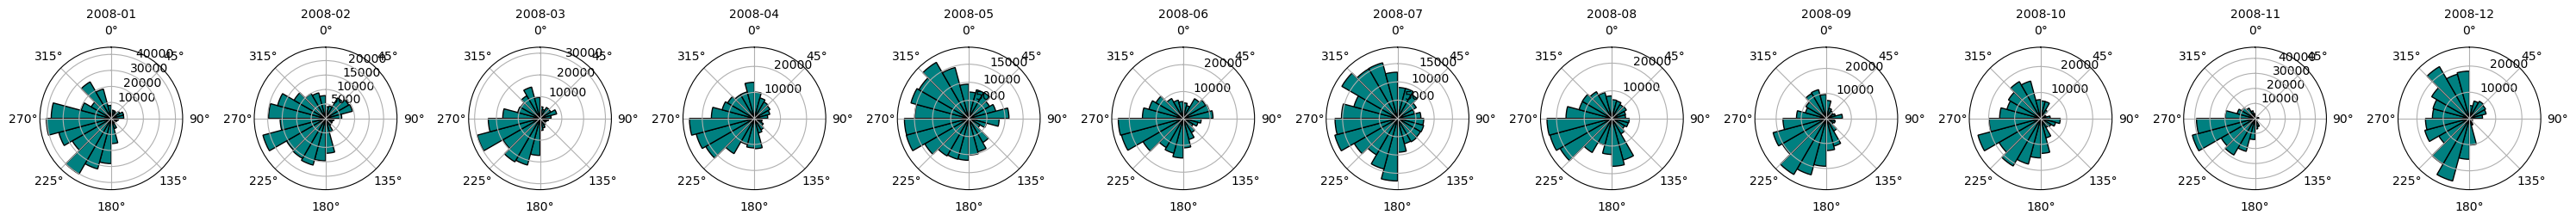

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

def plot_windrose_per_month(wind_data, max_rmax=None):
    """
    Generates wind roses for each available month from the combined wind direction data across all CSV files.
    
    Parameters:
    - wind_data: DataFrame containing wind direction data ('WD_080m') and a DateTime column ('DateTime-DateHeure').
    - max_rmax: The maximum radius for the polar plot (optional). If None, it will auto-scale based on data.
    """
    # Define the number of months (12), and the wind direction bins (15-degree intervals)
    months = np.arange(1, 13)
    bins = np.arange(0, 361, 15)

    # Extract year and month from the data
    available_years = wind_data['DateTime-DateHeure'].dt.year.unique()
    year = available_years[0]  # Assuming we are working with data from one year

    # Create a figure with 12 subplots (one per month)
    fig, axes = plt.subplots(nrows=1, ncols=12, subplot_kw=dict(projection='polar'), figsize=(30, 5))

    # Set a flag to check if any wind roses were generated
    wind_rose_generated = False

    for i, month in enumerate(months):
        # Filter the data for the specific month
        month_data = wind_data[wind_data['DateTime-DateHeure'].dt.month == month]
        
        # Extract wind direction data for the month
        wind_dir_data = month_data['WD_080m'].dropna()

        if len(wind_dir_data) > 0:
            wind_rose_generated = True

            # Calculate wind direction frequencies
            wind_freq, _ = np.histogram(wind_dir_data, bins=bins)
            
            # Convert bin centers to radians (for polar plot)
            bin_centers = np.deg2rad((bins[:-1] + bins[1:]) / 2)
            
            # Set the plot radius (rmax) based on the maximum frequency
            if max_rmax is None:
                rmax = wind_freq.max() * 1.1
            else:
                rmax = max_rmax

            # Plot the wind rose for the month
            ax = axes[i]
            ax.bar(bin_centers, wind_freq, width=np.deg2rad(15), bottom=0, edgecolor='black', color='teal')
            
            # Set the plot attributes
            ax.set_rmax(rmax)
            ax.set_theta_zero_location('N')  # North at the top
            ax.set_theta_direction(-1)       # Clockwise direction
            ax.set_title(f"{year}-{month:02d}", fontsize=10)  # Title with year and month

    plt.tight_layout()
    
    if wind_rose_generated:
        plt.show()
    else:
        print("No wind data available for any month.")

def process_csv_files_in_folder(folder_path):
    """
    Processes all CSV files in the specified folder, extracts wind direction data, and generates wind roses for each available month.
    
    Parameters:
    - folder_path: Path to the folder containing CSV files.
    """
    csv_files = glob(os.path.join(folder_path, "*.csv"))  # Find all CSV files in the folder

    # Initialize an empty DataFrame to hold combined data
    combined_data = pd.DataFrame()

    for csv_file in csv_files:
        try:
            # Read the CSV file
            wind_data = pd.read_csv(csv_file)

            # Check if necessary columns exist
            if 'WD_080m' not in wind_data.columns or 'DateTime-DateHeure' not in wind_data.columns:
                print(f"Skipping {csv_file}: Missing 'WD_080m' or 'DateTime-DateHeure' column.")
                continue
            
            # Convert 'DateTime-DateHeure' to datetime format (assuming format 'YYYYMMDDHHMM')
            wind_data['DateTime-DateHeure'] = pd.to_datetime(wind_data['DateTime-DateHeure'].astype(str), format='%Y%m%d%H%M', errors='coerce')

            # Append the data to the combined DataFrame
            combined_data = pd.concat([combined_data, wind_data])

        except Exception as e:
            print(f"Error processing {csv_file}: {e}")

    # Plot wind roses for each month, using the combined data
    if not combined_data.empty:
        print("Generating wind roses for all available months...")
        plot_windrose_per_month(combined_data)
    else:
        print("No valid data found in any CSV file.")

# Example usage: Specify the folder path containing the CSV files
folder_path = r"D:\UCalgary_Lectures\GEOG_683\Data_workspace\rahmansunbeam_20241012_181339"
process_csv_files_in_folder(folder_path)
